## Iris Species Dataset

""
- The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
- Predicted attribute: class of iris plant
- Number of Instances: 150 (50 in each of three classes)
- Number of features (attributes): 4 numeric, predictive attributes and the class
- Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
       - Iris Setosa
       - Iris Versicolour
       - Iris Virginica
- Missing Attribute Values: None
- Class Distribution: 33.3% for each of 3 classes.

"" 

Fisher, R.A.. (1988). Iris. UCI Machine Learning Repository.

In [73]:
from sklearn.datasets import load_iris
import wget
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
import pickle


### Download dataset


In [74]:
os.getcwd()

'/home/saito/Documents/picpay/iris-classifier-challenge/notebooks'

In [75]:
def download_dataset():
    # data_url = ''
    # response = requests.get(url, stream=True)

    ##With requests
    #url = 'https://www.facebook.com/favicon.ico'
    #r = requests.get(url, allow_redirects=True)
    #open('facebook.ico', 'wb').write(r.content)

    
    root_path = os.getcwd().replace('notebooks', '')
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    wget.download(url, root_path+'/data/iris-data.csv')
    
    #iris = load_iris()
    #dataset_path = '/'
    #with open((dataset_path + folder_name), 'wb') as dataset:
    #    dataset.write(response.content)
        

download_dataset()

100% [.................................] 4551 / 4551

### Load dataset


In [76]:
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species' ]
data = pd.read_csv('../data/iris-data.csv', names=column_names, header=None)

### Dataset Overview

In [77]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Data Preprocessing

In [81]:
#Separate feature from label
data_x = data.drop(['Species'], axis=1)

print(f"data_x shape - {data_x.shape}")
print(f"data_x head - {data_x.head()}")

data_x shape - (150, 4)
data_x head -    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [82]:
data_y = data['Species']

print(f"data_y type - {type(data_y)}")
print(f"data_y shape - {data_y.shape}")
print(f"data_y head - {data_y.head()}")
print(f"data_y head - {data_y.tail()}")

data_y type - <class 'pandas.core.series.Series'>
data_y shape - (150,)
data_y head - 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
data_y head - 145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, dtype: object


In [83]:
#convert Labels to numerical
label_encoder = LabelEncoder()
data_y = label_encoder.fit_transform(data_y)


print(f"data_y type - {type(data_y)}")
print(f"data_y head - {data_y[:10]}")
print(f"data_y tail - {data_y[-10:]}")
print(f"data_y lenght - {len(data_y)}")

data_y type - <class 'numpy.ndarray'>
data_y head - [0 0 0 0 0 0 0 0 0 0]
data_y tail - [2 2 2 2 2 2 2 2 2 2]
data_y lenght - 150


In [84]:
#split dataset into train, test dataset
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.15,random_state=0)

print(f"X_train type - {type(x_train)}")
print(f"X_train head - {x_train.head()}")
print(f"X_train tail - {x_train.tail()}")
print(f"X_train shape - {x_train.shape}")

print(f"y_train type - {type(y_train)}")
print(f"y_train head - {y_train[:10]}")
print(f"y_train tail - {y_train[-10:]}")
print(f"y_train len - {len(y_train)}")

X_train type - <class 'pandas.core.frame.DataFrame'>
X_train head -      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
8              4.4           2.9            1.4           0.2
126            6.2           2.8            4.8           1.8
22             4.6           3.6            1.0           0.2
44             5.1           3.8            1.9           0.4
97             6.2           2.9            4.3           1.3
X_train tail -      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
9              4.9           3.1            1.5           0.1
103            6.3           2.9            5.6           1.8
67             5.8           2.7            4.1           1.0
117            7.7           3.8            6.7           2.2
47             4.6           3.2            1.4           0.2
X_train shape - (127, 4)
y_train type - <class 'numpy.ndarray'>
y_train head - [0 2 0 0 1 1 0 2 1 0]
y_train tail - [1 1 1 0 0 0 2 1 2 0]
y_train len - 127


## Models Experimentations

Based on report from Kaggle Compation of Iris Species Dataset we can have a good startpoint for define some classification algorithm to try to achieve aprox. 90% of accuracy in test dataset.

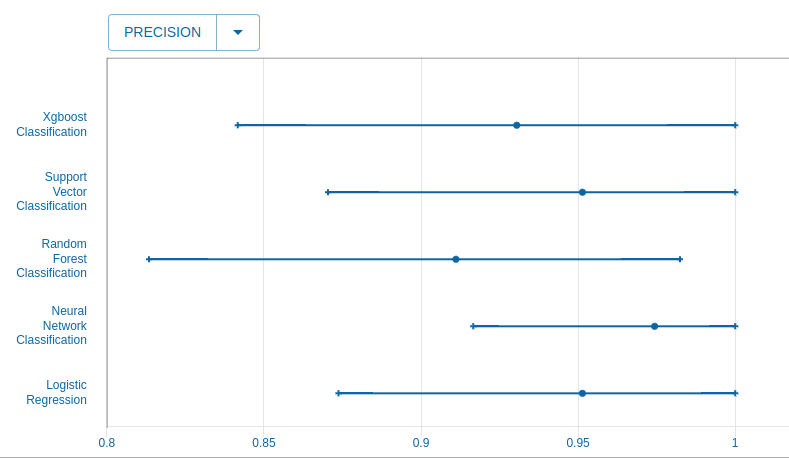

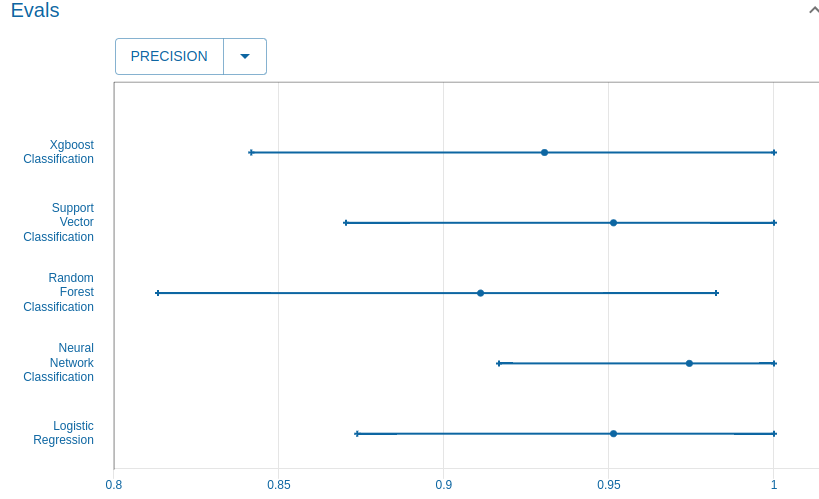

In [85]:
display.Image("../assets/images/precision-benchmark.png")

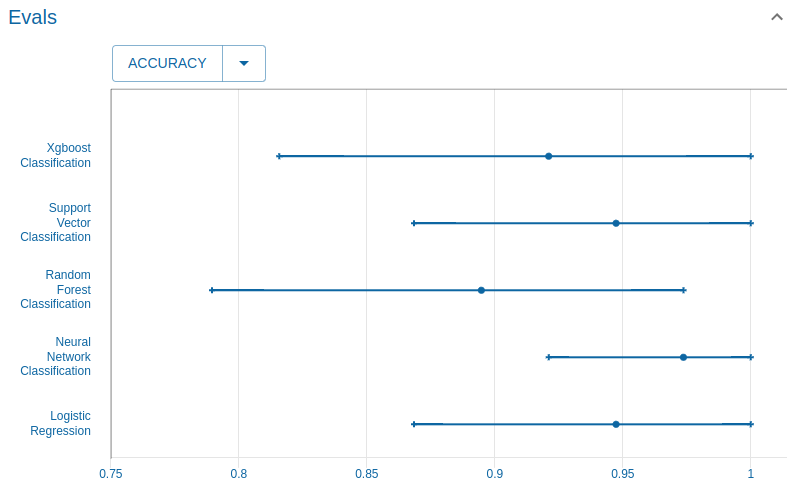

In [86]:
display.Image("../assets/images/accuracy-benchmark.png")

So, we are going to start with 3 differents algorithms:

- Logistic Regression
- Support Vector Classification
- Xgbboost Classification

In [87]:
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

### Define ALL models

In [88]:
#LogisticRegression
log_reg = LogisticRegression(max_iter=75,multi_class='multinomial')

#SVM
svm = SVC()

#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

#RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=150)

#XGBClassifier
xgb = XGBClassifier(n_estimators=80,learning_rate=0.01)

#GaussianNB
gaussian = GaussianNB()


In [89]:
classifiers = {
    'Logistic Regression':log_reg,
    'Support Vector Machine':svm,
    'K Nearest Neighbor': knn,
    'Random Forest':rand_forest,
    'Xg Boost':xgb,
    'Gaussian Naive Bayes':gaussian,
}
print(classifiers)

{'Logistic Regression': LogisticRegression(max_iter=75, multi_class='multinomial'), 'Support Vector Machine': SVC(), 'K Nearest Neighbor': KNeighborsClassifier(), 'Random Forest': RandomForestClassifier(n_estimators=150), 'Xg Boost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...), 'Gaussian Naive Bayes': G

In [90]:
%%time
for clf in classifiers.keys(): 
    #Exacute train
    classifiers[clf].fit(x_train,y_train)
    
    #Test on testing dataset
    y_pred = classifiers[clf].predict(x_test)
    
    #Performance Metrics
    acc_score = round(accuracy_score(y_test,y_pred)*100, 4)
    score = round(classifiers[clf].score(x_train, y_train)*100, 4)
    precision = round(precision_score(y_test, y_pred,average='micro')*100, 4)
    conf_matrix = confusion_matrix(y_test, y_pred,)
    recall =  round(recall_score(y_test, y_pred,average='micro')*100, 4)
    f1 = round(f1_score(y_test,y_pred,average='micro')*100, 4)
    
    print(f"{clf} ------->> accuracy_score = {acc_score}%")
    print(f"{clf} ------->> score = {score}%")
    print(f"{clf} ------->> precision = {precision}%")
    print(f"{clf} ------->> conf_matrix = ")
    print(f"{conf_matrix}")
    print(f"{clf} ------->> recall = {recall}%")
    print(f"{clf} ------->> f1 score = {f1}%")
    
    #Save trained model
    models_dir = '../models/dev/'
    model_name = clf.replace(' ', '') + '.pkl'
    model_path = models_dir + model_name
    with open(model_path, 'wb') as model_file:
      pickle.dump(classifiers[clf], model_file)

/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression ------->> accuracy_score = 100.0%
Logistic Regression ------->> score = 96.8504%
Logistic Regression ------->> precision = 100.0%
Logistic Regression ------->> conf_matrix = 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0  5]]
Logistic Regression ------->> recall = 100.0%
Logistic Regression ------->> f1 score = 100.0%
Support Vector Machine ------->> accuracy_score = 100.0%
Support Vector Machine ------->> score = 96.063%
Support Vector Machine ------->> precision = 100.0%
Support Vector Machine ------->> conf_matrix = 
[[ 7  0  0]
 [ 0 11  0]
 [ 0  0  5]]
Support Vector Machine ------->> recall = 100.0%
Support Vector Machine ------->> f1 score = 100.0%
K Nearest Neighbor ------->> accuracy_score = 95.6522%
K Nearest Neighbor ------->> score = 95.2756%
K Nearest Neighbor ------->> precision = 95.6522%
K Nearest Neighbor ------->> conf_matrix = 
[[ 7  0  0]
 [ 0 10  1]
 [ 0  0  5]]
K Nearest Neighbor ------->> recall = 95.6522%
K Nearest Neighbor ------->> f1 score = 95.6522%
Ran

### Test Prediction on Trained Models


In [110]:
%%time

#Load trained files from pickle

#uso any test sample to predict

models_dir = '../models/dev/'

sample_test_input = x_test.iloc[0].values.reshape(1, -1)
print(f"sample_test_input - > {sample_test_input}")
print(f"sample_test_input type - > {type(sample_test_input)}")
print(f"sample_test_input shape - > {sample_test_input.shape}")
sample_test_label = y_test[0]
print(f"sample_test_label - > {sample_test_label}")
print(f"sample_test_label type - > {type(sample_test_label)}")

#print(classifiers.keys())

for clf in classifiers.keys(): 
    #Load trained model
    model_name = clf.replace(' ', '') + '.pkl'
    model_path = models_dir + model_name
    print(f"model_path-> {model_path}")
    with open(model_path, 'rb') as model_file:
        loaded_model = pickle.load(model_file)
        
        #Try to predict
        output = loaded_model.predict(sample_test_input)
        print(f"{clf} ------->> output = {output}")
    


sample_test_input - > [[5.8 2.8 5.1 2.4]]
sample_test_input type - > <class 'numpy.ndarray'>
sample_test_input shape - > (1, 4)
sample_test_label - > 2
sample_test_label type - > <class 'numpy.int64'>
model_path-> ../models/dev/LogisticRegression.pkl
Logistic Regression ------->> output = [2]
model_path-> ../models/dev/SupportVectorMachine.pkl
Support Vector Machine ------->> output = [2]
model_path-> ../models/dev/KNearestNeighbor.pkl
K Nearest Neighbor ------->> output = [2]
model_path-> ../models/dev/RandomForest.pkl
Random Forest ------->> output = [2]
model_path-> ../models/dev/XgBoost.pkl
Xg Boost ------->> output = [2]
model_path-> ../models/dev/GaussianNaiveBayes.pkl
Gaussian Naive Bayes ------->> output = [2]
CPU times: user 187 ms, sys: 0 ns, total: 187 ms
Wall time: 63 ms


/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/saito/Documents/picpay/iris-classifier-challenge/.venv/lib/python3.9/site-packages/

### Model Selection